[[   8  -73    9  -40   10  -51   11  -57]
 [   9  -40   10  -51   11  -57   12  -72]
 [  10  -51   11  -57   12  -72   13  -83]
 [  11  -57   12  -72   13  -83   14 -105]
 [  12  -72   13  -83   14 -105   15 -105]
 [  13  -83   14 -105   15 -105   16 -105]
 [   8   38   10  226   11  184   12  202]
 [  10  226   11  184   12  202   13  218]
 [  11  184   12  202   13  218   15  405]
 [  12  202   13  218   15  405   16  382]
 [   8   56    9   -9   10  -29   11   -9]
 [   9   -9   10  -29   11   -9   12    0]
 [  10  -29   11   -9   12    0   13    0]
 [  11   -9   12    0   13    0   14    0]
 [  12    0   13    0   14    0   15    0]
 [  13    0   14    0   15    0   16    0]
 [  14    0   15    0   16    0   17    0]
 [  15    0   16    0   17    0   18    0]
 [   8 1355    9 1355   10 1591   11 1642]
 [   9 1355   10 1591   11 1642   12 1675]]
[ -72  -83 -105 -105 -105  -87  218  405  382  366    0    0    0    0
    0    0    0    0 1675 1675]
Mean Squared Error on Test Set: 5400

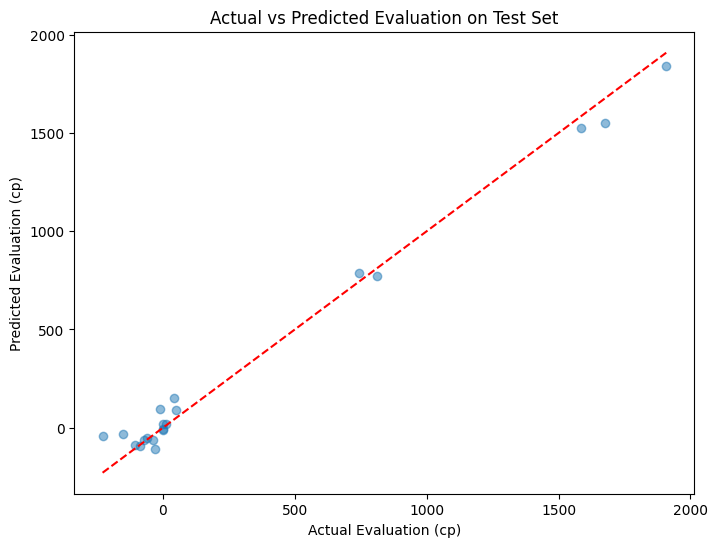

In [ ]:
import re
import numpy as np
from sklearn.linear_model import LinearRegression

def parse_file(filename):
    """Parse the file into blocks (each block is separated by an empty line).
    Returns a list of blocks where each block is a list of dictionaries with keys 'depth' and 'score'."""
    blocks = []
    with open(filename, 'r') as f:
        content = f.read()
    
    # Split blocks by two or more newlines
    raw_blocks = re.split(r'\n\s*\n', content.strip())
    
    for block in raw_blocks:
        lines = block.strip().splitlines()
        block_data = []
        for line in lines:
            # Use regex to extract depth and cp score
            depth_match = re.search(r'\bdepth\s+(\d+)', line)
            score_match = re.search(r'\bscore\s+cp\s+(-?\d+)', line)
            if depth_match and score_match:
                depth = int(depth_match.group(1))
                score = int(score_match.group(1))
                block_data.append({'depth': depth, 'score': score})
        # Only add non-empty blocks
        if block_data:
            # Sort the block by depth in case they are not in order
            block_data.sort(key=lambda x: x['depth'])
            blocks.append(block_data)
    return blocks

def construct_samples(blocks):
    """Construct feature and label samples.
    For each block, for every line with index i such that i>=4 and current depth >= 8,
    we create a sample where the features are the previous four scores in reverse order plus the current depth.
    The label is the current score.
    """
    X, y = [], []
    for block in blocks:
        # Ensure we have at least 5 evaluations in this block
        if len(block) < 5:
            continue
        # Iterate over indices starting at 4 (i.e. the 5th element)
        for i in range(4, len(block)):
            current_depth = block[i]['depth']
            # Only consider samples with current depth >= 8
            if current_depth < 8:
                continue
            # The previous four evaluations in reverse order (most recent first)
            prev_scores = [
                block[i-1]['score'],
                block[i-2]['score'],
                block[i-3]['score'],
                block[i-4]['score']
            ]
            features = prev_scores + [current_depth]
            X.append(features)
            y.append(block[i]['score'])
    return np.array(X), np.array(y)

def main():
    filename = 'output.txt'  # Replace with your file name
    blocks = parse_file(filename)
    X, y = construct_samples(blocks)
    
    # Print shapes for debugging
    print("Feature shape:", X.shape)
    print("Label shape:", y.shape)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Example: predict using the first sample features (or new data in the same format)
    if len(X) > 0:
        prediction = model.predict([X[0]])
        print("For features {} the predicted evaluation is {:.2f}, actual was {}"
              .format(X[0], prediction[0], y[0]))
    
    # Optionally, show the model coefficients
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

if __name__ == "__main__":
    main()
